In [7]:
# Agregar librerias
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [8]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# Agregar dataset
pima = pd.read_csv("diabetes.csv", header=None, names=col_names, sep=",", skiprows=1)

In [12]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [14]:
#Dividir el conjunto de datos en características y variable de destino
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Características
y = pima.label # Variable objetivo

In [15]:
# Divida el conjunto de datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% entrenamiento y 30% test

In [16]:
# Crear objeto clasificador de árbol de decisión
clf = DecisionTreeClassifier()

# Entrenamiento Clasificador de árboles de decisión
clf = clf.fit(X_train,y_train)

#Predecir la respuesta para el conjunto de datos de prueba
y_pred = clf.predict(X_test)

In [17]:
# Precisión del modelo, ¿con qué frecuencia es correcto el clasificador?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.683982683982684


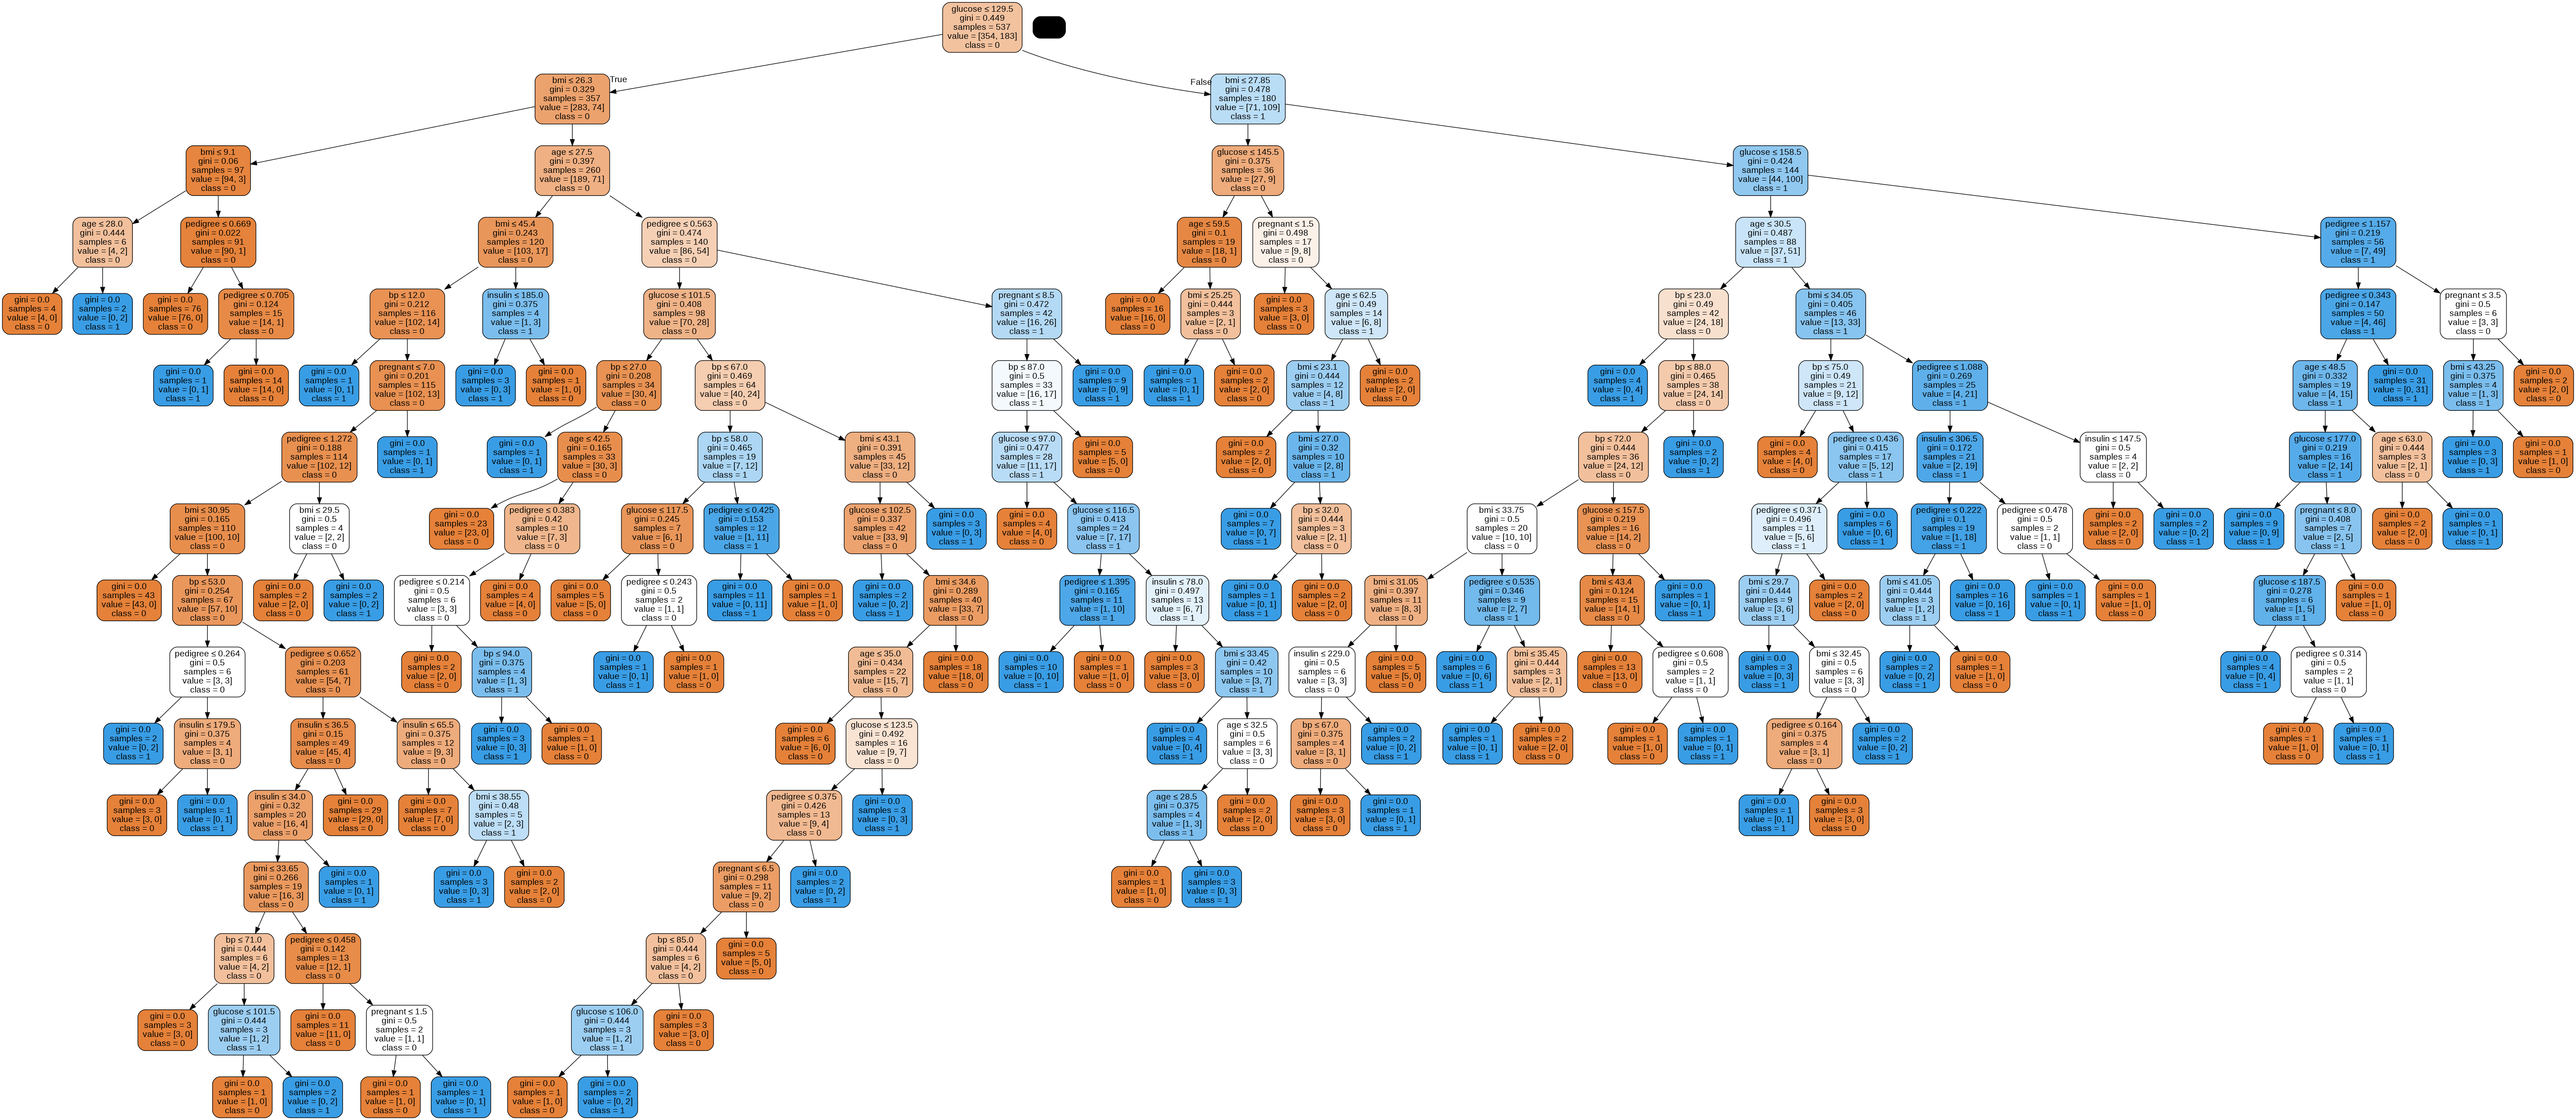

In [18]:
from six import StringIO
from sklearn.tree import export_graphviz
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

In [20]:
# Crear objeto clasificador de árbol de decisión
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Entrenamiento Clasificador de árboles de decisión
clf = clf.fit(X_train,y_train)

#Predecir la respuesta para el conjunto de datos de prueba
y_pred = clf.predict(X_test)

# Precisión del modelo, ¿con qué frecuencia es correcto el clasificador?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7705627705627706


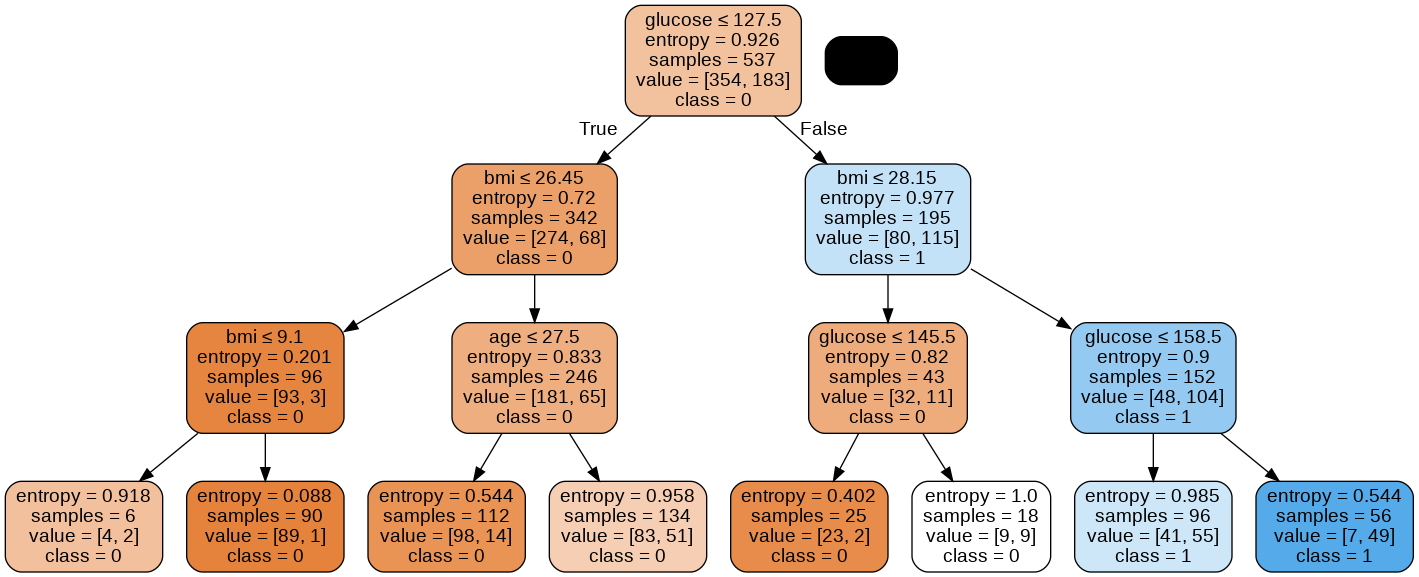

In [21]:
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())